In [1]:
from os import listdir
import numpy as np
import cv2
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

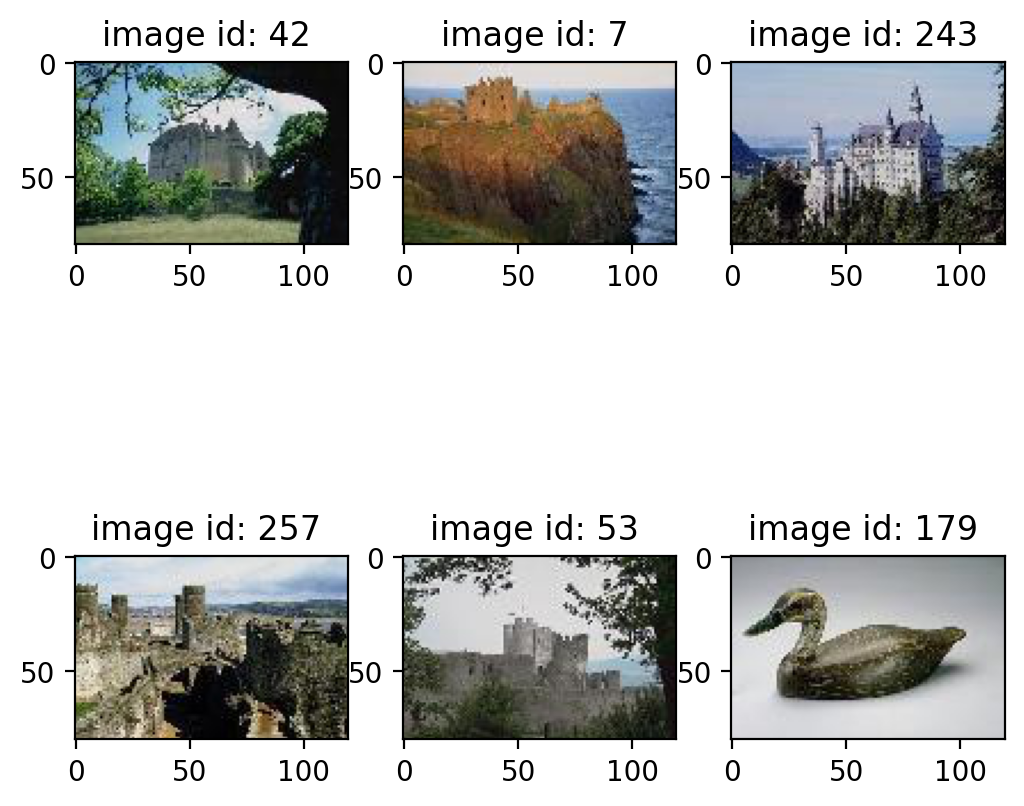

In [2]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

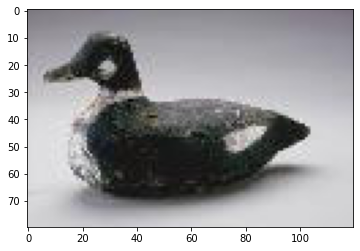

In [3]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/img.jpg')
plt.imshow(img_requete)

In [4]:
def color_Moments(img):
    colorFeatures=np.zeros(6)
    colorFeatures[0]=np.mean(img[:,:,0])
    colorFeatures[1]=np.mean(img[:,:,1])
    colorFeatures[2]=np.mean(img[:,:,2])
    colorFeatures[3]=np.std(img[:,:,0])
    colorFeatures[4]=np.std(img[:,:,1])
    colorFeatures[5]=np.std(img[:,:,2])
    return colorFeatures

In [5]:
def CBIR_Indexation1():
    features=np.zeros([len(loaded_images),7])
    for i in range (len(loaded_images)):
        loaded_images[i]=loaded_images[i]
        moments = cv2.moments(loaded_images[i].flatten())
        huMoments = cv2.HuMoments(moments).flatten()
        features[i]=huMoments
    return features

In [6]:
def CBIR_Indexation2():
    features=np.zeros([len(loaded_images),32])
    
    for i in range (len(loaded_images)):
        
        hist = cv2.calcHist([loaded_images[i]],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
        hist = cv2.normalize(hist,None).flatten()
        features[i]=hist
    return features

In [7]:
CBIR_Indexation2()[1]

array([6.68261126e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.96016902e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.11049272e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.65666544e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.26923817e-01, 0.00000000e+00, 1.60513707e-02, 0.00000000e+00,
       3.41009706e-01, 0.00000000e+00, 2.75166333e-02, 1.70341060e-02,
       2.02771381e-01, 0.00000000e+00, 4.28800881e-01, 2.99079597e-01,
       3.27578979e-04, 0.00000000e+00, 3.41337293e-01, 5.00868261e-01])

In [7]:
def CBIR_Indexation3():
    features=np.zeros([len(loaded_images),6])
    for i in range (len(loaded_images)):
        features[i]=color_Moments(loaded_images[i])
    return features 

In [16]:
CBIR_Indexation3()[1]

array([131.61010417, 131.5675    , 102.95052083,  40.58993566,
        43.30415716,  56.16750571])

In [8]:
list1 = []
imreq1=color_Moments(img_requete)
imreq2 = cv2.calcHist([img_requete],[0,1,2],None,[8,2,2],[0,180,0,256,0,256]).flatten()
moments = cv2.moments(img_requete.flatten())
imreq3 = cv2.HuMoments(moments).flatten()
list1.append(imreq1)
list1.append(imreq2)
list1.append(imreq3)

In [9]:
list3=[]
for i in range(6):
    list3.append(imreq1[i])
for i in range(32):
    list3.append(imreq2[i])
for i in range(7):
    list3.append(imreq3[i])

In [10]:
list3
arraydistance1 = np.array(list3)
arraydistance1.shape

(45,)

In [11]:
arraydistance1

array([1.43430417e+02, 1.43027500e+02, 1.45490938e+02, 6.64284840e+01,
       6.55263884e+01, 6.76278875e+01, 3.70000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.25800000e+03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.56000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.23000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.03000000e+02, 1.50000000e+02,
       1.90000000e+01, 1.62000000e+02, 1.00000000e+00, 5.00000000e+00,
       1.00000000e+00, 1.40600000e+03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.30500000e+03, 1.78491983e+01, 3.18593881e+02,
       6.96379589e+01, 6.96379589e+01, 4.84944531e+03, 1.24298174e+03,
       0.00000000e+00])

In [44]:

features=[]
def CBIR_Indexation4():
    
    for i in range (len(loaded_images)):
        list2=[]
        for j in range(7):
            list2.append(CBIR_Indexation1()[i][j])
        for j in range(32):
            list2.append(CBIR_Indexation2()[i][j])
        for j in range(6):
            list2.append(CBIR_Indexation3()[i][j])
        features.append(list2)
    return features

In [31]:

arraydistance2 = np.array(CBIR_Indexation4())

In [32]:
arraydistance2

array([[  15.73024512,  247.44061161,  716.2131066 , ...,   57.08014992,
          57.35566866,   67.15136647],
       [  19.96415645,  398.56754274,  239.91641182, ...,   40.58993566,
          43.30415716,   56.16750571],
       [  25.21807704,  635.95140947, 1109.36025819, ...,   40.18884923,
          43.67417653,   62.04243771],
       ...,
       [  24.59330718,  604.83075794, 1636.72734058, ...,   68.48269902,
          73.77012512,   76.39358424],
       [  22.2813008 ,  496.45636549, 2220.62476651, ...,   53.07985362,
          65.76802482,   80.46930726],
       [  22.21599919,  493.5506198 ,  789.25085187, ...,   44.06644839,
          40.57894464,   57.66920029]])

In [33]:

import scipy.spatial.distance as dist

def CBIR_Recherche(arraydistance1,arraydistance2):
    distances = {}
    for i in range(len(loaded_images)):
       
        distances[i]=dist.euclidean(arraydistance1,arraydistance2[i])
        
        distance=dict(sorted(distances.items(),key=lambda x: x[1]))
    return distance

In [34]:
distanes_CBIR=CBIR_Recherche(arraydistance1,arraydistance2)

In [35]:
result = distanes_CBIR.keys()
  
# Convert object to a list
data = list(result)
  
# Convert list to an array
arraydistance3 = np.array(data)
  
# print the numpy array
print(arraydistance3)

[181 176 163 178 149 153 186 188 168 167 146 148 173 242 179 156 150 175
 166 152 151 160 187 169 194  73 157 172 198 111 229 203 206 137 226 208
 207 209 126 180 210 182  23 170 195 205 215 204 202 217 155  33 141 236
 183 193 212 216 109 191 185 190 197 142 140 171 214 136 161  38 165 138
 192 144 184 189 199 174 139 196 162  87  84 237 211 147 116 232 112 159
 154 119 177 164 213 143 158  48 201 218  16  61 145 108 200   1  74 252
  85 122  54  79   3 238  11 121  72  62  24  90  26  25  50 129  20  69
 113  39 247  63  86 221 123 222  78 107  10 266  44  53  47  65 265  59
  43   0 227  81 103   5 223 110 104 269  17 118 262  12 235  52  49  60
 249  82  45  64 124 125 243 233   2 245  89 102  75 239 130 240 261 228
 219 244 263 254  13  93 260 114  94 267  34   8  51  56  70  58  91 256
  92  67 248 101  22 134 246  18 132   4 241  41  37  31 268  21 259  28
  71 106 220  99  40 120  55  88  42 115 135  77 255  95 257 105 230  80
 131  76  97 234  19 225  83 258  46 100 251  30  6

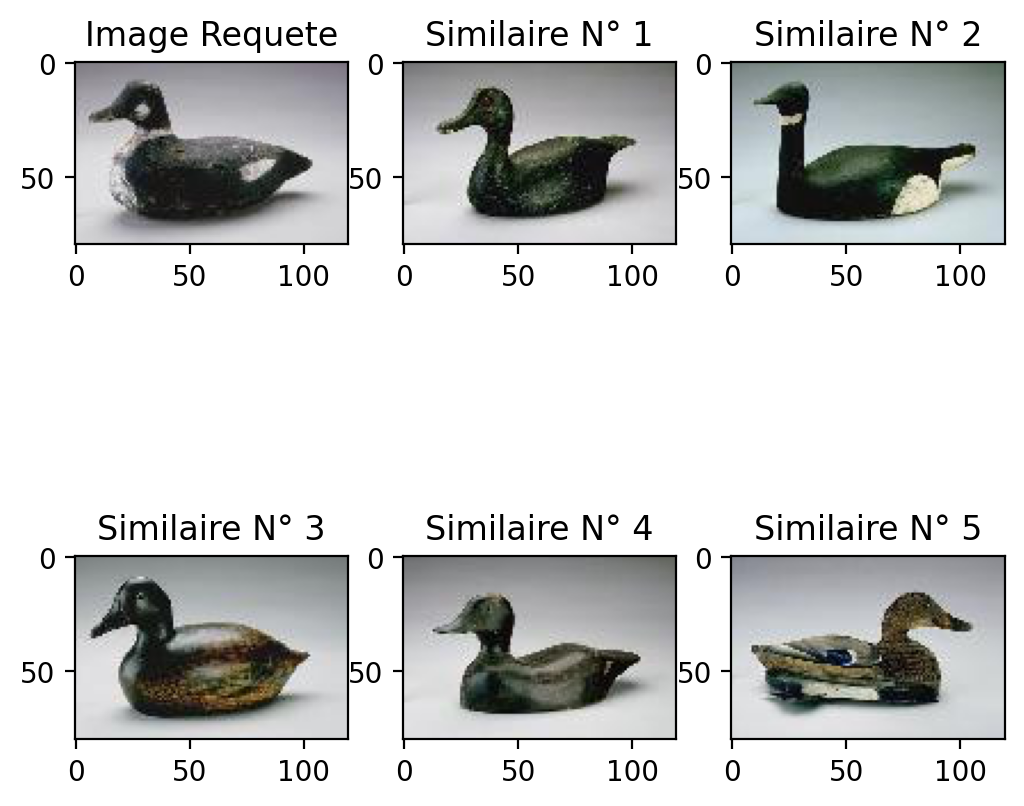

In [37]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[arraydistance3[i]])
  ax1.set_title('Similaire N° %s' %(i+1))